In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

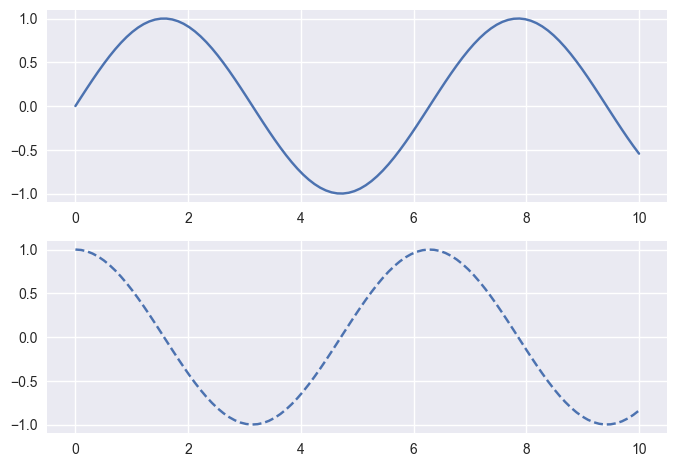

In [8]:
plt.style.use('seaborn')
x = np.linspace(0, 10, 100)

plt.figure()
plt.subplot(2, 1, 1) # rows, columns, panel number
plt.plot(x, np.sin(x), '-')
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x), '--')

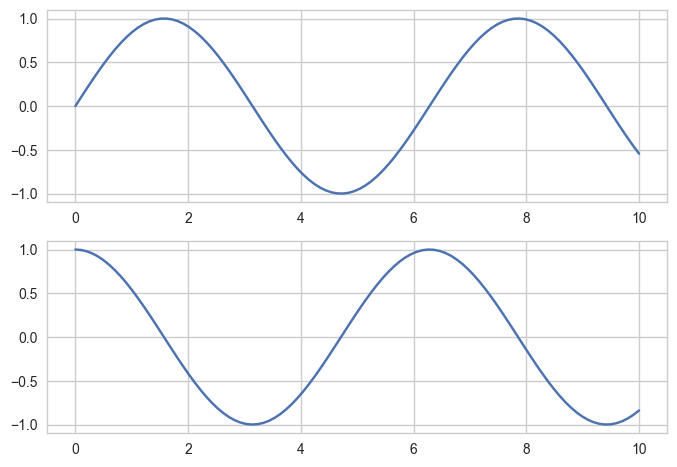

In [9]:
plt.style.use('seaborn-whitegrid')
# Es lo mismo hacer esto
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

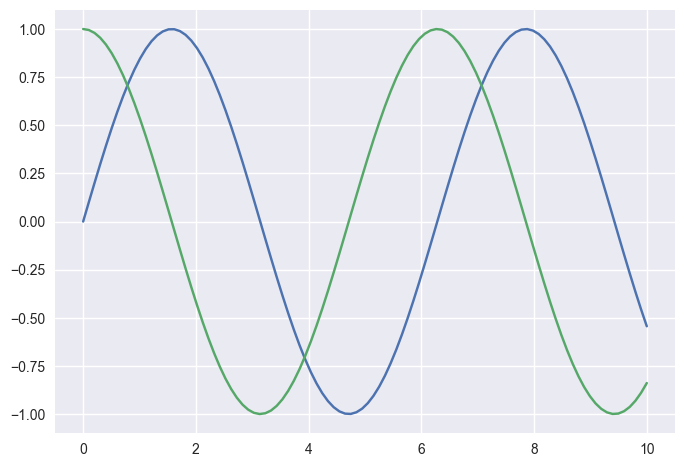

In [10]:
plt.style.use('seaborn')
fig = plt.figure()
ax = plt.axes()

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

Styling the plot

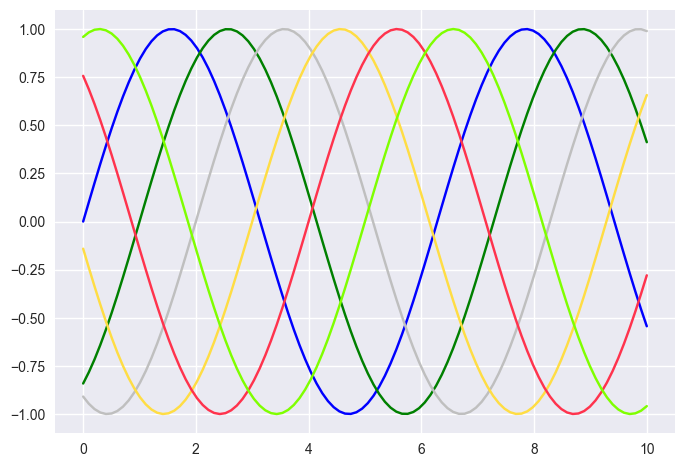

In [11]:
plt.plot(x, np.sin(x - 0), color='blue') # by name
plt.plot(x, np.sin(x - 1), color='g') # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75') # grayscale 0-1
plt.plot(x, np.sin(x - 3), color='#FFDD44') # hex code
plt.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.3)) # rgb tuple
plt.plot(x, np.sin(x - 5), color='chartreuse') # html color name

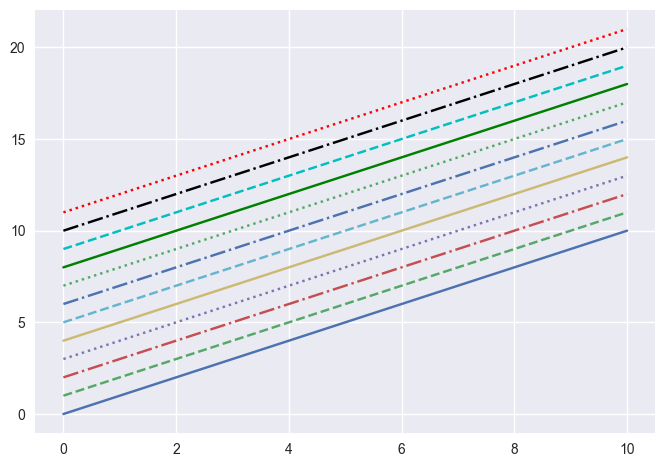

In [12]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

plt.plot(x, x + 4, linestyle='-') # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':') # dotted

plt.plot(x, x + 8, '-g') # solid green
plt.plot(x, x + 9, '--c') # dashed cyan
plt.plot(x, x + 10, '-.k') # dashdot black
plt.plot(x, x + 11, ':r') # dotted red

(-1.0, 1.0)

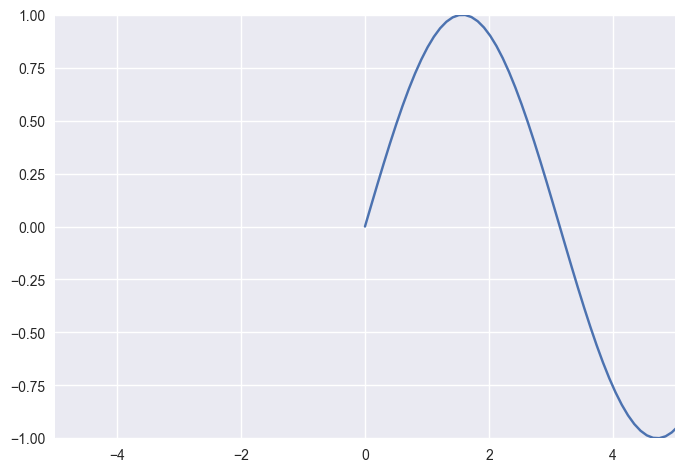

In [13]:
# Ajustar el plot
plt.plot(x, np.sin(x))

plt.xlim(-5, 5)
plt.ylim(-1, 1)

# plt.axis([-5, 5, -1, 1]) es lo mismo

(-0.5, 10.5, -1.0999445244849302, 1.0999973583088063)

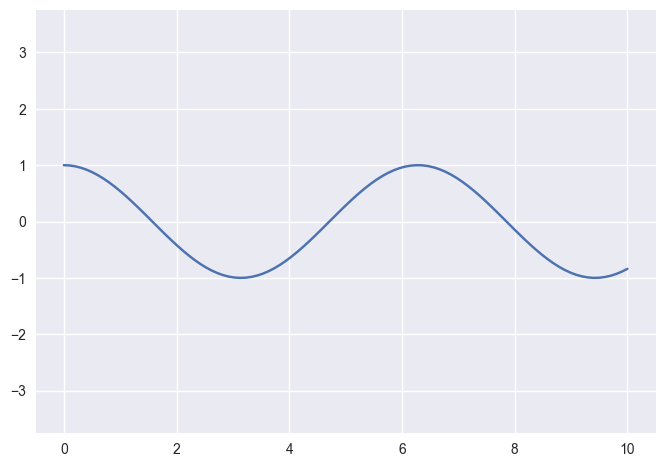

In [14]:
plt.plot(x, np.cos(x))
plt.axis('equal')

Text(0, 0.5, 'x values')

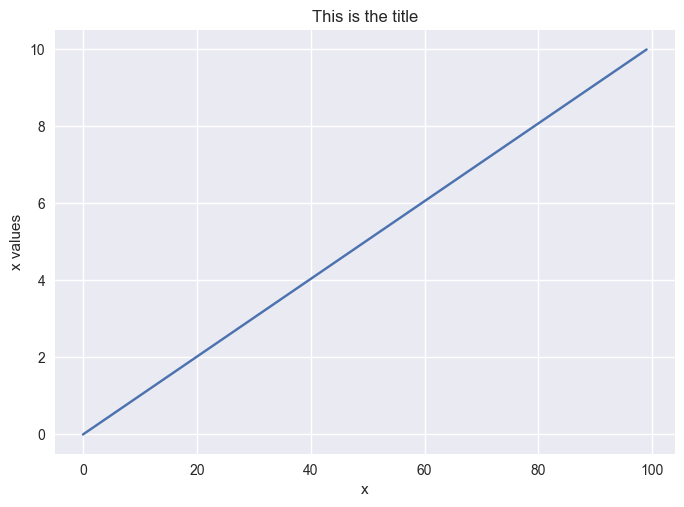

In [15]:
# Labeling

plt.plot(x)
plt.title('This is the title')
plt.xlabel('x')
plt.ylabel('x values')

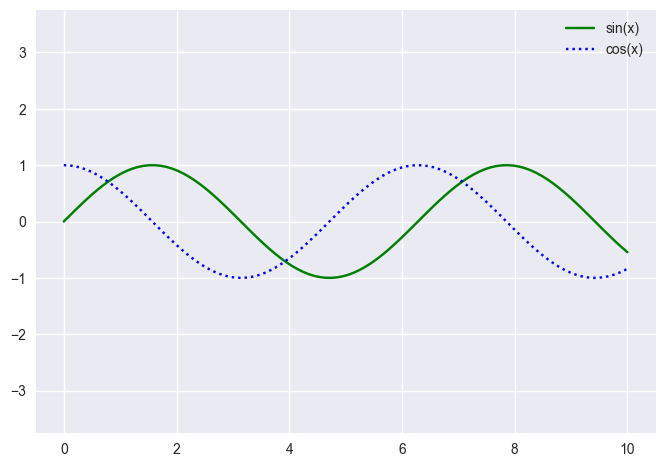

In [16]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sin(x)'),
 Text(0.5, 1.0, 'A simple plot')]

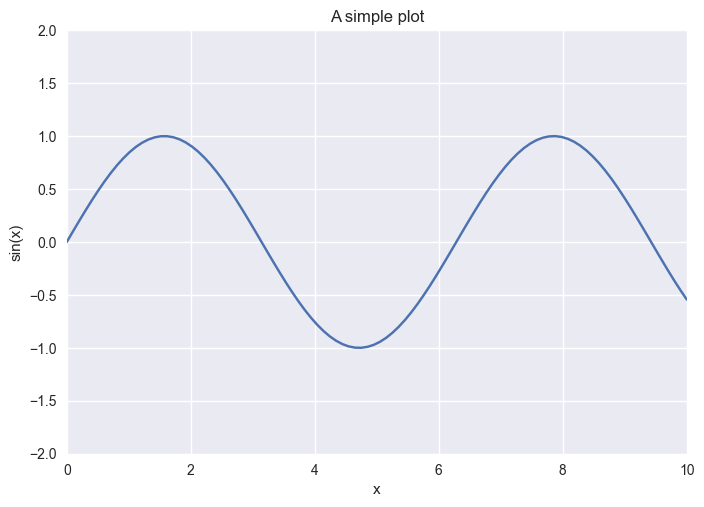

In [17]:
# plt.xlabel() -> ax.set_xlabel()
# plt.ylabel() -> ax.set_ylabel()
# plt.xlim() -> ax.set_xlim()
# plt.ylim() -> ax.set_ylim()
# plt.title() -> ax.set_title()

ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title= 'A simple plot')

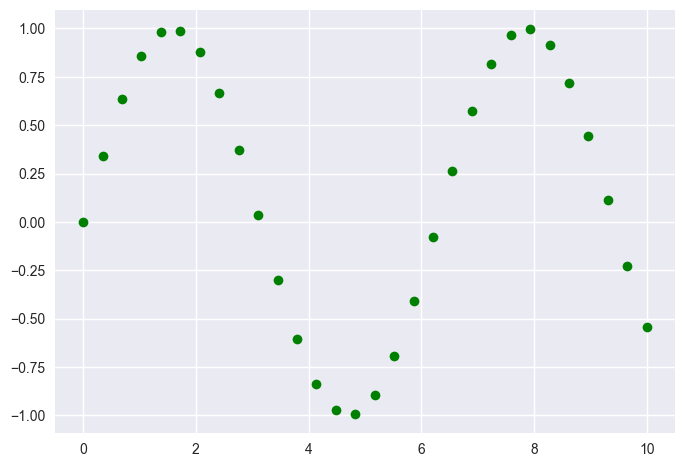

In [18]:
# Scatter plot
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='g')

(0.0, 1.0)

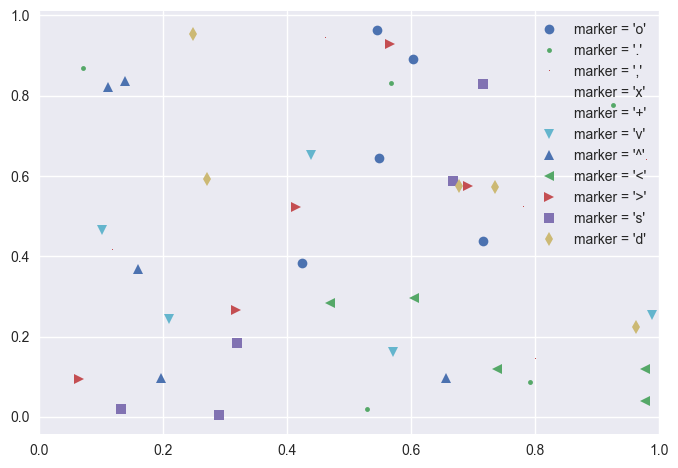

In [19]:
# Different markers type
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label=f"marker = '{marker}'")

plt.legend()
plt.xlim(0, 1)

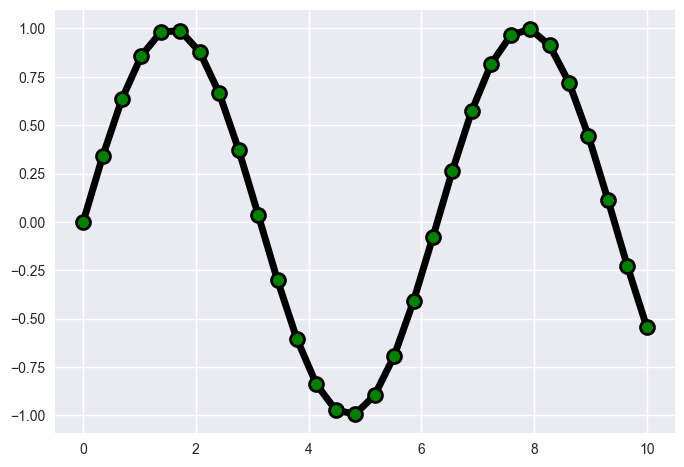

In [20]:
plt.plot(x, y, '-ok', # puedo combinarlos: line, circle marker, black
         markersize=10, linewidth=5,
         markerfacecolor='green',
         markeredgecolor='black',
         markeredgewidth=2) 

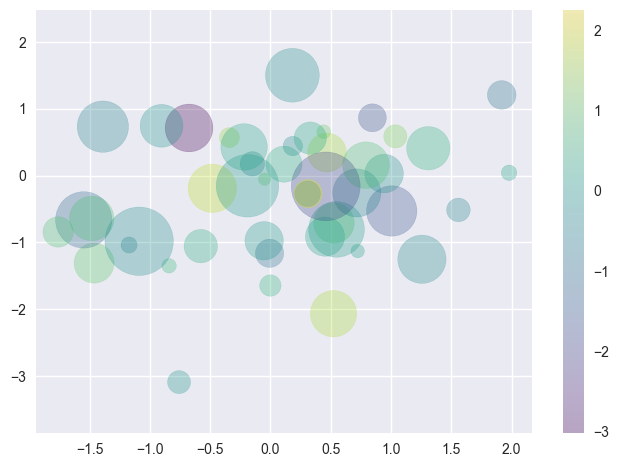

In [21]:
# plt.scatter()
rng = np.random.RandomState(19)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.randn(100)
sizes = 1000 * rng.randn(100)

plt.scatter(x ,y, c=colors, s=sizes, alpha=.3, cmap='viridis')
plt.colorbar()

Text(0, 0.5, 'sepal width (cm)')

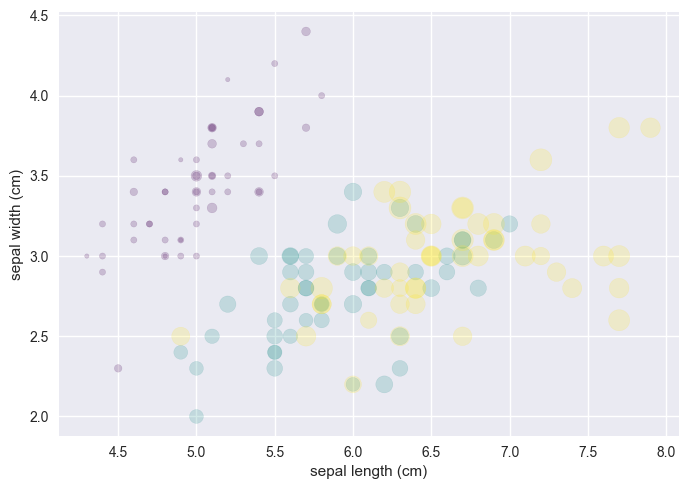

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

<ErrorbarContainer object of 3 artists>

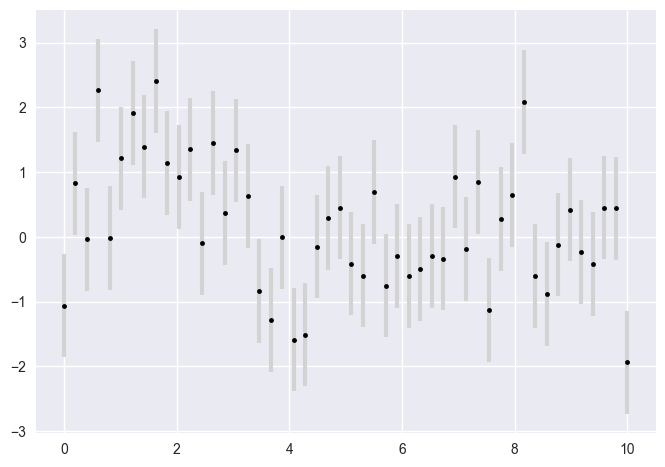

In [23]:
# Visualizar errores

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k',
            ecolor='lightgray', elinewidth=3, capsize=0)

(0.0, 10.0)

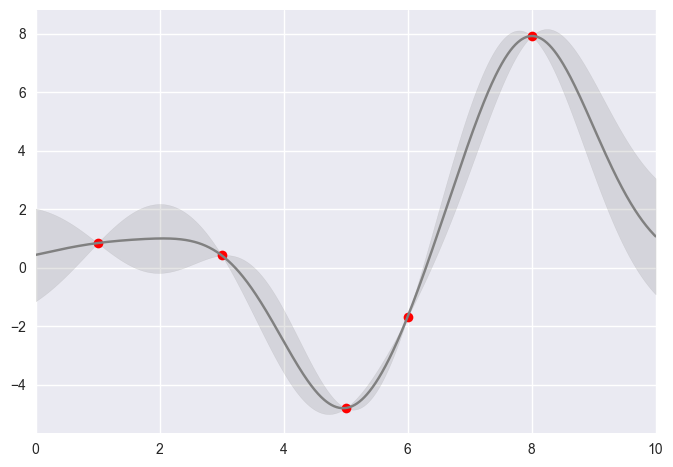

In [24]:
# Gaussian process regression (GPR)
from sklearn.gaussian_process import GaussianProcessRegressor
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit_ori = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * dyfit_ori

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=.2)
plt.xlim(0, 10)

Histograms, Binnings and Density

(array([ 1.,  1.,  8.,  6., 10., 15., 25., 19., 42., 41., 40., 71., 83.,
        78., 74., 93., 68., 66., 74., 54., 41., 23., 28., 13.,  9.,  6.,
         5.,  2.,  3.,  1.]),
 array([-2.90271323, -2.70250598, -2.50229873, -2.30209148, -2.10188423,
        -1.90167698, -1.70146974, -1.50126249, -1.30105524, -1.10084799,
        -0.90064074, -0.70043349, -0.50022625, -0.300019  , -0.09981175,
         0.1003955 ,  0.30060275,  0.50080999,  0.70101724,  0.90122449,
         1.10143174,  1.30163899,  1.50184624,  1.70205348,  1.90226073,
         2.10246798,  2.30267523,  2.50288248,  2.70308973,  2.90329697,
         3.10350422]),
 [<matplotlib.patches.Polygon at 0x21a9a7860c8>])

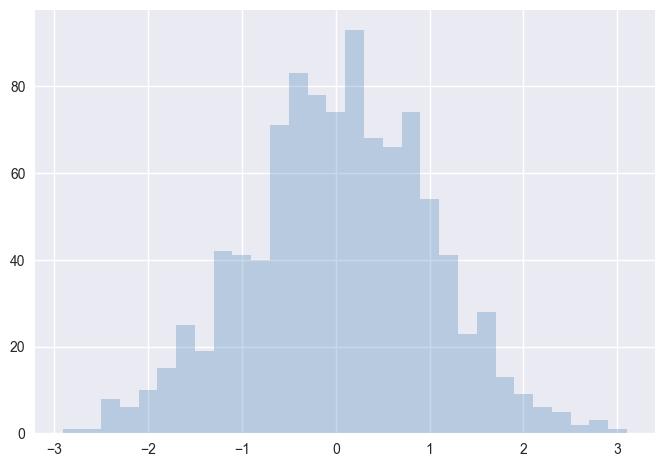

In [25]:
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
data = np.random.randn(1000)
plt.hist(data, bins=30, alpha=.3,
        histtype='stepfilled', color='steelblue',
        edgecolor='none')

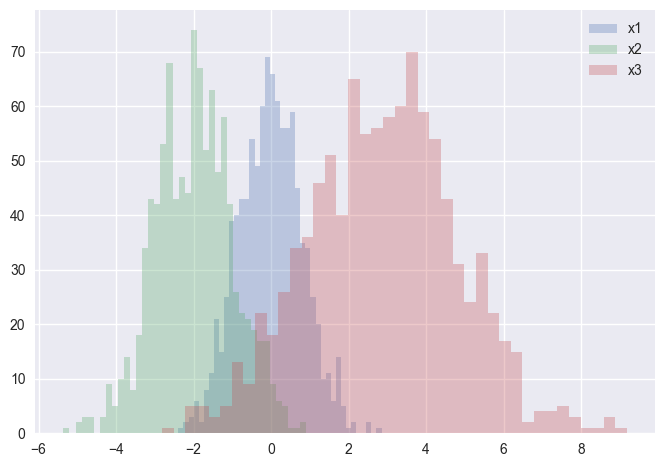

In [26]:
x1 = np.random.normal(0, 0.8, 1000) 
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=.3, bins=40)

plt.hist(x1, **kwargs, label='x1')
plt.hist(x2, **kwargs, label='x2')
plt.hist(x3, **kwargs, label='x3')
plt.legend()

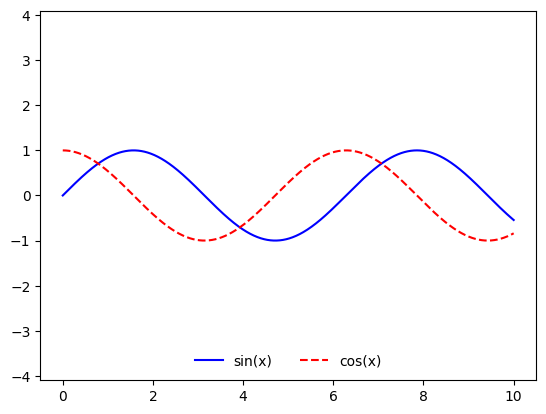

In [27]:
plt.style.use('default')
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='sin(x)')
ax.plot(x, np.cos(x), '--r', label='cos(x)')
ax.axis('equal')

ax.legend(loc='lower center', frameon=False, ncol=2)

In [28]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    RGB_weight = [.299, .587, .114]
    luminace = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminace[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2),
                        subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

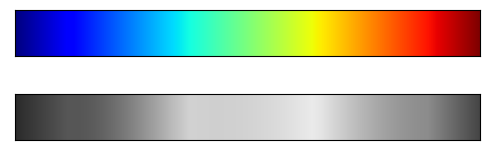

In [29]:
view_colormap('jet')

Subplots by Hand

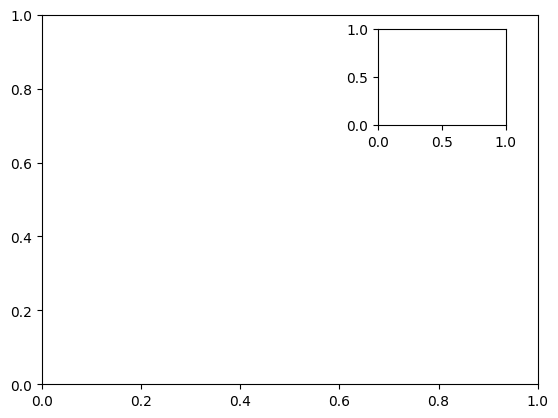

In [30]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

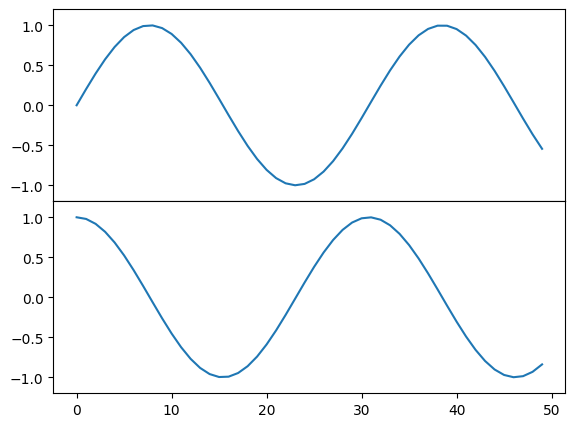

In [34]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

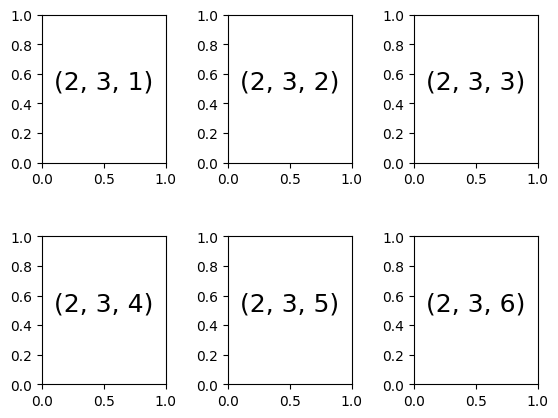

In [36]:
# Simple grids of subplots
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

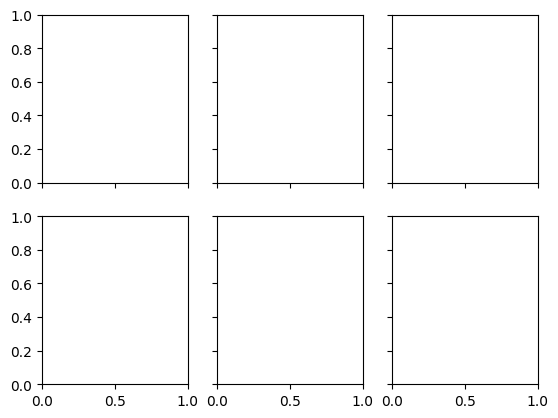

In [39]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

<AxesSubplot:>

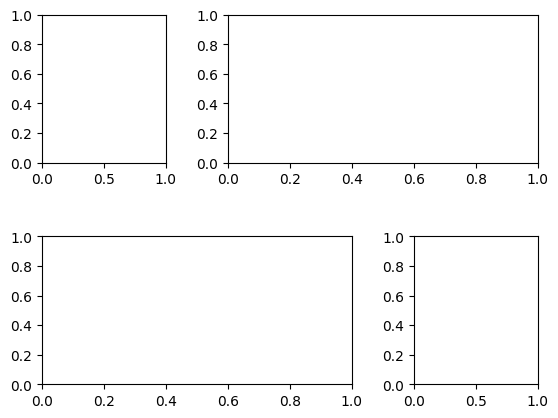

In [63]:
grid = plt.GridSpec(2, 3, wspace=0.5, hspace=0.5)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])

plt.subplot(grid[1, 2])
plt.subplot(grid[1, :2])
#plt.subplot(grid[1, 2])

Anotaciones en plots

In [65]:
births = pd.read_csv('./datasets/births.csv')

In [66]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

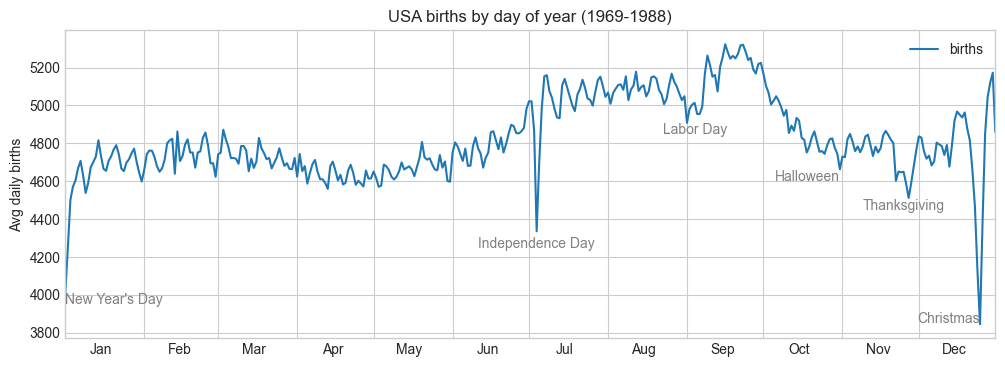

In [70]:
import matplotlib as mpl

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')

# ax.text(x, y, string, kwords)
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style) # ha = horizontal alignment
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha='right', **style)

ax.set(title='USA births by day of year (1969-1988)',
       ylabel='Avg daily births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))